In [1]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## We will work with the "Adult" Data Set of the UCI Repository

Here we will try to predict whether one's salary is above or below $50,000/year. 
The original dataset can be found on UCI Repository: https://archive.ics.uci.edu/ml/datasets/adult

### Read the file

In [2]:
# Source: https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
# taken and modified slightly from https://fairmlbook.org/code/adult.html

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] #feaures of the dataset 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' #link of the training data
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' #link of the test data

# This will download 3.8M
df_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?") #read csv training
# This will download 1.9M
df_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1) #read csv test

num_train = len(df_train) #number of training instances
#print(f'num_train={num_train}')
print(df_train.head())

   Age         Workclass  fnlwgt  Education  Education-Num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Martial Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital Gain  Capital Loss  Hours per week        Country Target  
0          2174             0              40  United-States  <=50K  
1             0             0             

### Q1: Replace the labels of the training and test sets so that "Target = 1" means high income and "Target = 0" means low income. The target column should be an integer (binary) column eventually.

#### A1:

In [3]:
#now we can replace the labels
df_train.Target = df_train.Target.replace({'>50K':1,'<=50K':0})
df_test.Target = df_test.Target.replace({'>50K.':1,'<=50K.':0})
print(df_test.head())

   Age  Workclass  fnlwgt     Education  Education-Num      Martial Status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          Occupation Relationship   Race     Sex  Capital Gain  Capital Loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   Hours per week        Country  Target  
0      

### Q2: Inspect the column names and the data type of each column. Answer the following.

#### Q2.1: List how many missing values there are in each column for training and test sets.

#### A2.1:

In [4]:
#first list the columns
pd.set_option('max_colwidth', None)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [5]:
#now see the number of missing values for each column -- training
print("Missing Values in Training Set:")
missing_values_train = df_train.isnull().sum()
print(missing_values_train)
print("\n")

Missing Values in Training Set:
Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64




In [6]:
#see the number of missing values for each column -- test
print("Missing Values in Training Set:")
missing_values_test = df_test.isnull().sum()
print(missing_values_test)
print("\n")

Missing Values in Training Set:
Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64




#### Q2.2: How many missing values there are in total for the training set?

#### A2.2:

In [7]:
# Calculate the total number of missing values in the training set
total_missing_values_train = df_train.isnull().sum().sum()
print("Total Missing Values in Training Set:", total_missing_values_train)

Total Missing Values in Training Set: 4262


#### Q2.3: How many rows are there with at least one NaN?

#### A2.3:

In [8]:
#one possible way:
#take a True/False Series for whether each row includes NaN. Then sum them, where True will be taken as = 1.
rows_with_nan_train = df_train.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN in Training Set:", rows_with_nan_train)

Number of Rows with at least one NaN in Training Set: 2399


In [9]:
print(f'Number of rows in df_train={len(df_train)},Number of rows in df_test = {len(df_test)} ')

Number of rows in df_train=32561,Number of rows in df_test = 16281 


#### Q2.4: If NaN's were identially distributed among the NaN rows at random, then what is the expectation of the number of NaNs in a row that has at least one NaN? If you find the same expectation for the test set, do these values look alike?

#### A2.4:

In [10]:
# For the training set
total_nan_train = df_train.isnull().sum().sum()
rows_with_nan_train = df_train.isnull().any(axis=1).sum()
expectation_train = total_nan_train / rows_with_nan_train

# For the test set
total_nan_test = df_test.isnull().sum().sum()
rows_with_nan_test = df_test.isnull().any(axis=1).sum()
expectation_test = total_nan_test / rows_with_nan_test

print("Expectation of NaNs per row in Training Set:", expectation_train)
print("Expectation of NaNs per row in Test Set:", expectation_test)


Expectation of NaNs per row in Training Set: 1.7765735723218008
Expectation of NaNs per row in Test Set: 1.8042588042588044


### Q3: Let us inspect the target variable further.

#### Q3.1: What fraction of the training instances are making high income? Does a similar result hold for the test set?

#### A3.1:

In [11]:
df_train["Target"].mean()

0.2408095574460244

In [12]:
#print(df_test.head())
df_test["Target"].mean()

0.23622627602727106

#### Q3.2: If we classify everyone as a low-income instance, what is our accuracy, sensitivity, and specificy in the test set? Assume that a "positive" class is a high income class, that is, our end goal is to be able to tell who makes more money.

#### A3.2:

In [13]:
# Calculate the total number of instances in the test set
total_test_instances = len(df_test)

# Calculate the number of true negatives (low-income instances)
true_negatives_test = (df_test['Target'] == 0).sum()

# Calculate the accuracy

accuracy_test = true_negatives_test / total_test_instances
sensitivity = 0 #True Positives (TP): 0, because the classifier never predicts high income.
specificity = 1 #Ture Negative (TN): 0, because we classify everyone as low income, all low-income instances are collrectly identified. So the specificity in this case would be 1.

print(f'accuracy_test={accuracy_test},sensitivity={sensitivity}, specificity={specificity} ')

accuracy_test=0.7637737239727289,sensitivity=0, specificity=1 


#### Q3.3: List the fraction of high income instances within each group of "workclass" separately in the training set. Do you have an intuition on this?

#### A3.3:

In [14]:
df_train.groupby('Workclass', as_index=False)['Target'].mean() #or you can find this via alternative codes

,Workclass,Target
0,Federal-gov,0.386458
1,Local-gov,0.294792
2,Never-worked,0.000000
3,Private,0.218673
4,Self-emp-inc,0.557348
5,Self-emp-not-inc,0.284927
6,State-gov,0.271957
7,Without-pay,0.000000


In [15]:
df_test.groupby('Workclass', as_index=False)['Target'].mean() #or you can find this via alternative codes

,Workclass,Target
0,Federal-gov,0.402542
1,Local-gov,0.297220
2,Never-worked,0.000000
3,Private,0.216236
4,Self-emp-inc,0.545769
5,Self-emp-not-inc,0.267222
6,State-gov,0.259151
7,Without-pay,0.285714


#### Q3.4: Motivated by the question before, apply the following simple classification on the test set: if an instance has a workclass that is in the first or second highest-making group, then classify "1". What is the accuracy and the sensitivity of this model?

#### A3.4:

In [16]:
# Group by 'Workclass' and calculate the mean of 'Target', with as_index=False
workclass_income = df_train.groupby('Workclass', as_index=False)['Target'].mean()

# Sort the results in descending order based on 'Target' mean
sorted_workclass_income = workclass_income.sort_values(by='Target', ascending=False)

# Select the top two entries
top_two_workclasses = sorted_workclass_income.head(2)['Workclass']
# If you need it as a list
#print(top_two_workclasses)
top_two_workclasses_list = top_two_workclasses.tolist()

print("Top Two High-Income Workclasses:")
print(top_two_workclasses_list)

Top Two High-Income Workclasses:
['Self-emp-inc', 'Federal-gov']


In [17]:
greedy_workclass = df_test.apply(lambda row: 1 if row['Workclass'] in top_two_workclasses_list else 0, axis = 1) #apply a function to predict -- fill the dots

In [18]:
print(greedy_workclass.head())
print(greedy_workclass.sum())
print(greedy_workclass)

0    0
1    0
2    0
3    0
4    0
dtype: int64
1051
0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Length: 16281, dtype: int64


In [19]:
greedy_workclass_alt = []
for _, row in df_test.iterrows():
    if row['Workclass'] in top_two_workclasses_list:
        #print(row['Workclass'])
        greedy_workclass_alt.append(1)
    else:
        greedy_workclass_alt.append(0)




In [20]:
greedy_workclass_alt = pd.Series(greedy_workclass_alt)
print(greedy_workclass_alt.head())
print(f'greedy_workclass_alt.sum()= {greedy_workclass_alt.sum()}')
print(greedy_workclass_alt)


0    0
1    0
2    0
3    0
4    0
dtype: int64
greedy_workclass_alt.sum()= 1051
0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Length: 16281, dtype: int64


In [21]:
from sklearn.metrics import confusion_matrix #import sklearn's confusion matrix

# Assuming df_test['Target'] contains the true labels
# And greedy_workclass contains your predicted labels
cm = confusion_matrix(df_test['Target'], greedy_workclass)

In [22]:
print(cm)

[[11890   545]
 [ 3340   506]]


In [23]:
total = len(df_test) #number of instances
correct = cm[0,0]+cm[1,1] #number of collectly classified instances -- sum of the ??
accuracy = correct / total

TP = cm[0, 0]  # True Positives
FN = cm[1, 0]  # False Negatives
sensitivity = TP / (TP + FN)  #fraction of 1's that we can find out of true 1's

In [24]:
print("Accuracy:", accuracy, ", and Sensitivity:", sensitivity)

Accuracy: 0.7613782937166022 , and Sensitivity: 0.7806959947472094


### Q4: Further statistics and Outliers.

#### Q4.1: List the fraction of male and females within US citizens in the training set.

#### A4.1:

In [25]:
# Filter for US citizens
us_citizens = df_train[df_train['Country'] == 'United-States']

# Group by 'Sex' and count the number of instances
sex_counts = us_citizens['Sex'].value_counts()

# Calculate fractions
fraction_male = sex_counts['Male'] / us_citizens.shape[0]
fraction_female = sex_counts['Female'] / us_citizens.shape[0]

print("Fraction of Males among US citizens:", fraction_male)
print("Fraction of Females among US citizens:", fraction_female)

Fraction of Males among US citizens: 0.6680836475831333
Fraction of Females among US citizens: 0.3319163524168666


#### Q4.2: What is the most common occupation (training set)?

#### A4.2:

In [26]:
# Find the most common occupation
most_common_occupation = df_train['Occupation'].value_counts().idxmax()

print("Most Common Occupation:", most_common_occupation)

Most Common Occupation: Prof-specialty


#### Q4.3: Which occupations are the most common male and female instances, respectively (training set)?

#### A4.3:

In [27]:
# Find the most common occupation for females
most_common_occupation_female = df_train[df_train["Sex"]=="Female"]["Occupation"].value_counts().idxmax()

In [28]:
# Find the most common occupation for males
most_common_occupation_male = df_train[df_train["Sex"]=="Male"]["Occupation"].value_counts().idxmax()

In [29]:
print("Most Common Occupation for Males:", most_common_occupation_male)
print("Most Common Occupation for Females:", most_common_occupation_female)

Most Common Occupation for Males: Craft-repair
Most Common Occupation for Females: Adm-clerical


#### Q4.4: Plot the histogram of the "Age" column (using training set data). Let the histogram have 10 bins, and reflect the percentage of instances falling in the relevant bin on Y axis.  Visually try to see if there are outliers. Are there more outliers on the high age, or low age?

#### A4.4: 

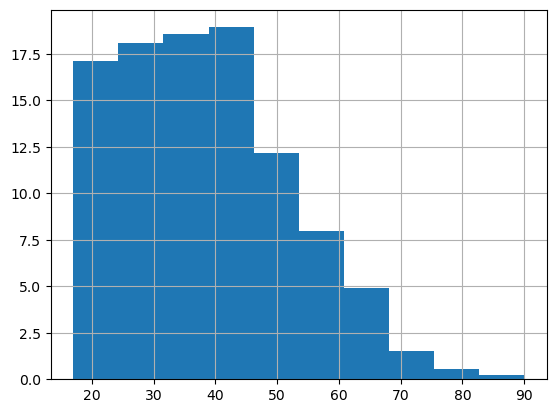

In [30]:
df_train["Age"].hist(bins=10, weights=np.ones_like(df_train["Age"]) * 100. / len(df_train)).plot()
plt.show()
plt.close()

#### Q4.5: Report the age on the $99$-th quantile. 

#### A4.5:

In [31]:
#Hint: the ".quantile" function of pandas will be enough
# Calculate the age at the 99th percentile
age_99th_percentile = df_train['Age'].quantile(0.99)
print("Age at the 99th percentile:", age_99th_percentile)

Age at the 99th percentile: 74.0


#### Q4.6: Given the previous analysis, would you say there are outliers in this dataset? 

#### A4.6: Given the histogram and the 99th percentile, the presence of individuals above 74 could be potentail outliers, if their age is signigicantly higher than 74. 

### Q5: Inspect the correlation of the numerical predictors with the target and report your findings (in training set). What does the correlation of "Age" tell us?

In [32]:
df_train[["Age"]].corrwith(df_train["Target"])

Age    0.234037
dtype: float64

### Q6: Let us apply Linear Regression for classification. 

#### Q6.1: Discuss why Linear Regression is not immediately applicable in this setting.

#### A6.1: Linear regression is designed for regression problems where the outcome is a continuous varaiable. However, the target variable here is a binary, making is a classification problem. Also we have rows including null values.

#### Q6.2: Drop rows that include NaN values.

#### A6.2:

In [33]:
df_train_dropna = df_train.dropna()

In [34]:
rows_with_nan_train_dropna = df_train_dropna.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN in Training Set:", rows_with_nan_train_dropna)

Number of Rows with at least one NaN in Training Set: 0


#### Q6.3: Train a linear regression model on the training set. Use the numeric columns only.

#### A6.3:

In [35]:
#Step 1 -- take the numeric columns
numericals = [] #start with an empty array
for i in range(len(df_train_dropna.dtypes)): #for all columns
    coltype = df_train_dropna.dtypes[i] #take the type of column
    if np.issubdtype(coltype,np.number): #check if the type is numberic
        numericals.append(df_train_dropna.columns[i]) # append the column name

In [36]:
print(numericals)

['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Target']


In [37]:
#Step 2 -- fit
from sklearn.linear_model import LinearRegression
X = df_train_dropna[numericals] #training predictors
y = df_train_dropna['Target'] #training target
clf = LinearRegression().fit(X, y) #time to fit

#### Q6.4: Apply the linear model that we just fit and predict the training target. Show the first couple of predictions.

#### A6.4: 

In [38]:
#use "clf.predict" function
# Predict the training target
train_predictions = clf.predict(X)

# Display the first few predictions
print("First few predictions:", train_predictions[:5], "mean",train_predictions.mean())

First few predictions: [-7.38951414e-16  1.83099136e-15  2.45719546e-15  2.42345710e-15
  1.79528186e-15] mean 0.24892248524633645


#### Q6.5: To make a classification on the *training set*, use a cutoff value = 0.4 so that if the output is more than this value then we classify as "1". Compute the accuracy, sensitivity, and specificity manually (do not use a function). Discuss the performance.

#### A6.5: 

In [39]:
print(train_predictions)

[-7.38951414e-16  1.83099136e-15  2.45719546e-15 ...  2.79063877e-15
  1.60511007e-15  1.00000000e+00]


In [40]:
cutoff = 0.4

In [41]:
# Convert predictions to binary using the cutoff
binary_predictions = [1 if x > cutoff else 0 for x in train_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives = sum((y == 1) & (np.array(binary_predictions) == 1))
true_negatives = sum((y == 0) & (np.array(binary_predictions) == 0))
false_positives = sum((y == 0) & (np.array(binary_predictions) == 1))
false_negatives = sum((y == 1) & (np.array(binary_predictions) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_train = (true_positives + true_negatives) / len(y)

# Sensitivity: TP / (TP + FN)
sensitivity_train = true_positives / (true_positives + false_negatives)

# Specificity: TN / (TN + FP)
specificity_train = true_negatives / (true_negatives + false_positives)

In [42]:
print(f'true_positives={true_positives}, true_negatives={true_negatives}, false_positives={false_positives}, false_negatives={false_negatives}')

true_positives=7508, true_negatives=22654, false_positives=0, false_negatives=0


In [43]:
print("Accuracy:", round(accuracy_train,3), "\nSensitivity:", round(sensitivity_train,3),\
      "\nSpecificity:", round(specificity_train,3))

Accuracy: 1.0 
Sensitivity: 1.0 
Specificity: 1.0


In [46]:
binary_predictions_series = pd.Series(binary_predictions)
print(binary_predictions_series.quantile(0.99))
#print(binary_predictions)

1.0


#### Q6.6: Apply the same on training set but decrease the cutoff down to 0.2. Inspect the metrics we looked before, and compare the results with the cutoff 0.4. Interpret the results.

#### A6.6:

In [47]:
cutoff_altenative = 0.2 #cutoff value

In [48]:
# Convert predictions to binary using the cutoff
binary_predictions_alt = [1 if x > cutoff_altenative else 0 for x in train_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives_alt = sum((y == 1) & (np.array(binary_predictions_alt) == 1))
true_negatives_alt = sum((y == 0) & (np.array(binary_predictions_alt) == 0))
false_positives_alt = sum((y == 0) & (np.array(binary_predictions_alt) == 1))
false_negatives_alt = sum((y == 1) & (np.array(binary_predictions_alt) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_train_alt = (true_positives_alt + true_negatives_alt) / len(y)

# Sensitivity: TP / (TP + FN)
sensitivity_train_alt = true_positives_alt / (true_positives_alt + false_negatives_alt)

# Specificity: TN / (TN + FP)
specificity_train_alt = true_negatives_alt / (true_negatives_alt + false_positives_alt)

In [49]:
print(f'true_positives_alt={true_positives_alt}, true_negatives_alt={true_negatives_alt}, false_positives_alt={false_positives_alt}, false_negatives_alt={false_negatives_alt}')

true_positives_alt=7508, true_negatives_alt=22654, false_positives_alt=0, false_negatives_alt=0


In [50]:
print("Accuracy:", round(accuracy_train_alt,3), "\nSensitivity:", round(sensitivity_train_alt,3),\
      "\nSpecificity:", round(specificity_train_alt,3))

Accuracy: 1.0 
Sensitivity: 1.0 
Specificity: 1.0


In [51]:
cutoff_altenative = 0.05 #cutoff value

# Convert predictions to binary using the cutoff
binary_predictions_alt = [1 if x > cutoff_altenative else 0 for x in train_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives_alt = sum((y == 1) & (np.array(binary_predictions_alt) == 1))
true_negatives_alt = sum((y == 0) & (np.array(binary_predictions_alt) == 0))
false_positives_alt = sum((y == 0) & (np.array(binary_predictions_alt) == 1))
false_negatives_alt = sum((y == 1) & (np.array(binary_predictions_alt) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_train_alt = (true_positives_alt + true_negatives_alt) / len(y)

# Sensitivity: TP / (TP + FN)
sensitivity_train_alt = true_positives_alt / (true_positives_alt + false_negatives_alt)

# Specificity: TN / (TN + FP)
specificity_train_alt = true_negatives_alt / (true_negatives_alt + false_positives_alt)

print(f'true_positives_alt={true_positives_alt}, true_negatives_alt={true_negatives_alt}, false_positives_alt={false_positives_alt}, false_negatives_alt={false_negatives_alt}')
print("Accuracy:", round(accuracy_train_alt,3), "\nSensitivity:", round(sensitivity_train_alt,3),\
      "\nSpecificity:", round(specificity_train_alt,3))

true_positives_alt=7508, true_negatives_alt=22654, false_positives_alt=0, false_negatives_alt=0
Accuracy: 1.0 
Sensitivity: 1.0 
Specificity: 1.0


#### Q6.7: Now use the linear model on the *test set*. Choose the cutoff value = 0.4 and return the accuracy, sensitivity, and specificity.

#### A6.7:

In [52]:
df_test_dropna = df_test.dropna()

#Step 2 -- fit
X_test = df_test_dropna[numericals] #training predictors
y_test = df_test_dropna['Target'] #training target
clf_test = LinearRegression().fit(X_test, y_test) #time to fit

#use "clf.predict" function
# Predict the training target
test_predictions = clf_test.predict(X_test)

# Display the first few predictions
print("First few predictions:", train_predictions[:5], "mean",test_predictions.mean())

cutoff = 0.4

# Convert predictions to binary using the cutoff
binary_predictions_test = [1 if x > cutoff else 0 for x in test_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives_test = sum((y_test == 1) & (np.array(binary_predictions_test) == 1))
true_negatives_test = sum((y_test == 0) & (np.array(binary_predictions_test) == 0))
false_positives_test = sum((y_test == 0) & (np.array(binary_predictions_test) == 1))
false_negatives_test = sum((y_test == 1) & (np.array(binary_predictions_test) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_test = (true_positives_test + true_negatives_test) / len(y)

# Sensitivity: TP / (TP + FN)
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

# Specificity: TN / (TN + FP)
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

print(f'true_positives_test={true_positives_test}, true_negatives_test={true_negatives_test}, false_positives_test={false_positives_test}, false_negatives_test={false_negatives_test}')

print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3))

First few predictions: [-7.38951414e-16  1.83099136e-15  2.45719546e-15  2.42345710e-15
  1.79528186e-15] mean 0.2456839309428951
true_positives_test=3700, true_negatives_test=11360, false_positives_test=0, false_negatives_test=0
Accuracy: 0.499 
Sensitivity: 1.0 
Specificity: 1.0


#### Q6.8: Try different cutoff values on the training set and choose the best one according to the performance on the training set. Choose the following metric to optimize: *keep accuracy above 76% and trying to obtain the best possible sensitivity*. What is the optimal cutoff value in your experiment? (Note: this approach will be discussed later).

#### A6.8: 
- Application of the previous chunks in an iterated manner.

In [53]:
optimal_cutoff = None
highest_sensitivity = 0

for cutoff in np.arange(0.1, 0.9, 0.01):
    binary_predictions = [1 if x > cutoff else 0 for x in train_predictions]
    true_positives = sum((y == 1) & (np.array(binary_predictions) == 1))
    true_negatives = sum((y == 0) & (np.array(binary_predictions) == 0))
    false_positives = sum((y == 0) & (np.array(binary_predictions) == 1))
    false_negatives = sum((y == 1) & (np.array(binary_predictions) == 0))

    accuracy = (true_positives + true_negatives) / len(y)
    sensitivity = true_positives / (true_positives + false_negatives)

    if accuracy >= 0.76 and sensitivity > highest_sensitivity:
        highest_sensitivity = sensitivity
        optimal_cutoff = cutoff

print(f"Optimal Cutoff: {optimal_cutoff}, Highest Sensitivity: {highest_sensitivity}")


Optimal Cutoff: 0.1, Highest Sensitivity: 1.0


#### Q6.9: In the previous question we tuned the cutoff value on the training set. This initialy makes sense, because we cannot tune on the test-set, which will be indirectly training on the test set. However, we also discussed in the validation-set approach that it is not a good practice to *compare* models on the training set, because of a natural bias in this procedure. Hence, it is a better approach to tune a value on a validation set. For this purpose, apply the following steps:
- Split the training set as 80% (training) - 20% (validation) sets. You can take the first 80% and last 20% and no need to randomize the selection.
- Train a linear model on the training set obtained in the previous approach. Training one model is enough.
- Compare cutoff values between 0.2 - 0.8 with 0.05 increments. Pick the best model by looking at the validation set, where the "best" model has an accuracy over 76% and has the highest sensitivity still.
- Test the validated cutoff on the test set and return the metrics.
- [Extra / optional] Instead of the hold-out validation that you just applied, try 5-fold cross validation in the original training set.

#### A6.9

In [54]:
#Step 1: Split the Training Set
split_index = int(len(df_train_dropna) * 0.8)
training_set = df_train_dropna[:split_index]
validation_set = df_train_dropna[split_index:]

In [55]:
#Step 2: Train a Linear Model

X_train = training_set[numericals]
y_train = training_set['Target']
clf = LinearRegression().fit(X_train, y_train)

In [56]:
#Step 3 and 4: Compare Cutoff Values and Pick the Best Model

best_cutoff = 0.2
best_sensitivity = 0

for cutoff in np.arange(0.2, 0.85, 0.05):
    validation_predictions = clf.predict(validation_set[numericals])
    binary_predictions = [1 if x > cutoff else 0 for x in validation_predictions]

    # Calculate metrics...
    # Similar to previous steps but using validation_set

    if accuracy >= 0.76 and sensitivity > best_sensitivity:
        best_sensitivity = sensitivity
        best_cutoff = cutoff
        

In [57]:
#Step 5: Test the Validated Cutoff on the Test Set
test_predictions = clf.predict(df_test[numericals])
binary_test_predictions = [1 if x > best_cutoff else 0 for x in test_predictions]


In [58]:
#Step 6: [Optional] 5-Fold Cross-Validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5)
best_cutoff = None
highest_sensitivity = 0

for cutoff in np.arange(0.2, 0.85, 0.05):
    sensitivities = []
    accuracies = []

    for train_index, val_index in kf.split(df_train_dropna):
        # Split data into training and validation sets
        X_train_fold = df_train_dropna.iloc[train_index][numericals]
        y_train_fold = df_train_dropna.iloc[train_index]['Target']
        X_val_fold = df_train_dropna.iloc[val_index][numericals]
        y_val_fold = df_train_dropna.iloc[val_index]['Target']

        # Train the model
        clf_fold = LinearRegression().fit(X_train_fold, y_train_fold)

        # Make predictions on the validation set
        val_predictions = clf_fold.predict(X_val_fold)
        binary_val_predictions = [1 if x > cutoff else 0 for x in val_predictions]

        # Calculate accuracy and sensitivity
        true_positives = sum((y_val_fold == 1) & (np.array(binary_val_predictions) == 1))
        true_negatives = sum((y_val_fold == 0) & (np.array(binary_val_predictions) == 0))
        false_positives = sum((y_val_fold == 0) & (np.array(binary_val_predictions) == 1))
        false_negatives = sum((y_val_fold == 1) & (np.array(binary_val_predictions) == 0))

        accuracy = accuracy_score(y_val_fold, binary_val_predictions)
        sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

        accuracies.append(accuracy)
        sensitivities.append(sensitivity)

    # Average metrics across folds
    avg_accuracy = np.mean(accuracies)
    avg_sensitivity = np.mean(sensitivities)

    # Update best cutoff if conditions are met
    if avg_accuracy >= 0.76 and avg_sensitivity > highest_sensitivity:
        highest_sensitivity = avg_sensitivity
        best_cutoff = cutoff

print(f"Optimal Cutoff: {best_cutoff}, Highest Average Sensitivity: {highest_sensitivity}")



Optimal Cutoff: 0.2, Highest Average Sensitivity: 1.0


#### Q6.10: Previously we have seen that if we decrese the cutoff value then we get more sensitivity as we try to classify more "1"s. Obviously we would expect to have sensitivity = 1 if we pick the smallest possible cutoff. To this end, try a cutoff = 0 on the test set and report the sensitivity. If the sensitivity is not equal to 1, please give a possible reason.

#### A6.10:

In [59]:
df_test_dropna = df_test.dropna()

#Step 2 -- fit
X_test = df_test_dropna[numericals] #training predictors
y_test = df_test_dropna['Target'] #training target
clf_test = LinearRegression().fit(X_test, y_test) #time to fit

#use "clf.predict" function
# Predict the training target
test_predictions = clf_test.predict(X_test)

# Display the first few predictions
print("First few predictions:", train_predictions[:5], "mean",test_predictions.mean())
cutoff = 0

# Convert predictions to binary using the cutoff
binary_predictions_test = [1 if x > cutoff else 0 for x in test_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives_test = sum((y_test == 1) & (np.array(binary_predictions_test) == 1))
true_negatives_test = sum((y_test == 0) & (np.array(binary_predictions_test) == 0))
false_positives_test = sum((y_test == 0) & (np.array(binary_predictions_test) == 1))
false_negatives_test = sum((y_test == 1) & (np.array(binary_predictions_test) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_test = (true_positives_test + true_negatives_test) / len(y)

# Sensitivity: TP / (TP + FN)
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

# Specificity: TN / (TN + FP)
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

print(f'true_positives_test={true_positives_test}, true_negatives_test={true_negatives_test}, false_positives_test={false_positives_test}, false_negatives_test={false_negatives_test}')

print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3))

First few predictions: [-7.38951414e-16  1.83099136e-15  2.45719546e-15  2.42345710e-15
  1.79528186e-15] mean 0.2456839309428951
true_positives_test=3700, true_negatives_test=1239, false_positives_test=10121, false_negatives_test=0
Accuracy: 0.164 
Sensitivity: 1.0 
Specificity: 0.109


#### Q6.11 [Bonus / Optional]: Encode "worksclass" with dummies so that we can include these variables in the linear regression (i.e., introduce a column for each value the workclass can take and write '1' if this is true -- note that you should drop one of these dummies without loss of generality as from the others you can figure out the one left out). Train the linear regression by using this new variable in addition to the previous variables. Test on the test set by using the cutoff value you found previously.

#### A6.11:
- One can iterate over the ".dtypes" of the training set and for every "O" data type, convert this to "Categorical". Then, using "pd.get_dummies" one can obtain dummies on this categorical variable. The rest is identical to what we did before -- only add the new additional numeric values.

In [60]:
#Step 1: Convert Categorical Variables to Dummies

# For the training set
df_train_dummies = pd.get_dummies(df_train, columns=['Workclass'], drop_first=True)

# For the test set
df_test_dummies = pd.get_dummies(df_test, columns=['Workclass'], drop_first=True)

# Ensure that both training and test sets have the same dummy columns
df_train_dummies, df_test_dummies = df_train_dummies.align(df_test_dummies, join='inner', axis=1)


In [61]:
#Step 2: Prepare the Data

# Assuming 'numericals' contains the names of your numeric predictor columns
X_train = df_train_dummies[numericals + list(df_train_dummies.columns[df_train_dummies.columns.str.startswith('Workclass_')])]
y_train = df_train_dummies['Target']


In [62]:
#Step 3: Train the Linear Regression Model

clf = LinearRegression().fit(X_train, y_train)
    

In [63]:
#Step 4: Test on the Test Set

X_test = df_test_dummies[numericals + list(df_test_dummies.columns[df_test_dummies.columns.str.startswith('Workclass_')])]
y_test = df_test_dummies['Target']

test_predictions = clf.predict(X_test)

# Apply the previously determined optimal cutoff
optimal_cutoff = 0.2 # (set this to the value found previously)
binary_test_predictions = [1 if x > optimal_cutoff else 0 for x in test_predictions]

# Calculate accuracy, sensitivity, and specificity
true_positives_test = sum((y_test == 1) & (np.array(test_predictions) == 1))
true_negatives_test = sum((y_test == 0) & (np.array(test_predictions) == 0))
false_positives_test = sum((y_test == 0) & (np.array(test_predictions) == 1))
false_negatives_test = sum((y_test == 1) & (np.array(test_predictions) == 0))

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_test = (true_positives_test + true_negatives_test) / len(y) if len(y_test) > 0 else 0

# Sensitivity: TP / (TP + FN)
sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test) if (true_positives_test + false_negatives_test) > 0 else 0

# Specificity: TN / (TN + FP)
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test) if (true_negatives_test + false_positives_test) > 0 else 0

print(f'true_positives_test={true_positives_test}, true_negatives_test={true_negatives_test}, false_positives_test={false_positives_test}, false_negatives_test={false_negatives_test}')

print("Accuracy:", round(accuracy_test,3), "\nSensitivity:", round(sensitivity_test,3),\
      "\nSpecificity:", round(specificity_test,3))


true_positives_test=17, true_negatives_test=0, false_positives_test=0, false_negatives_test=0
Accuracy: 0.001 
Sensitivity: 1.0 
Specificity: 0


### Final notes
Note that linear regression is not designed for such tasks, however, it works great in many cases. A variant of linear regression, that is called the *logistic regression*, takes a linear relationship as in the linear regression setting, but applies a non-linear mapping on the output. In return, we obtain predictions that are between [0,1], hence simply using "predict" function would classify the instances with a prediction of >= 0.5 as "1". We can similarly change the threshold. Although logistic regression will be introduced in more detail, we can also write similar code to make use of it easily as the following. 

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y) 
#X,y have to be filled before so that X comprises numerical variables

In [57]:
scores_linear_training = clf.predict(X) #predict function
# alternatively, for using a cutoff, first get the assigned 'probabilities' by using "probs = clf.predict_proba(X)"
# and then apply thresholds.

As extra, you can try coding other concepts such as:
- Visualising lift charts and comparing models via lift charts.
- Applying more advanced algorithms and/or using further categorial variables by using several encodings.
- Analyzing the categorical variables further to see if we have an ordinal relationship that can be modeled via integers.
- As mentioned above, using K fold cross validation.